<a href="https://colab.research.google.com/github/mouryag/TransferLearn_ImageClassification/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

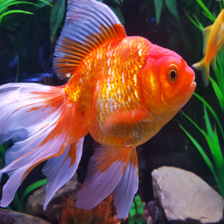

In [ ]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/4141147800_813f660b47.jpg'),
 PosixPath('datasets/flower_photos/daisy/2538504987_fe524b92a8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2045022175_ad087f5f60_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/498159452_b71afd65ba.jpg'),
 PosixPath('datasets/flower_photos/daisy/8681746439_d6beeefbf9.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg'),
 PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg')]

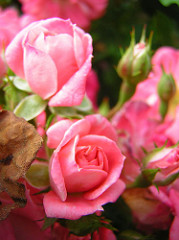

In [ ]:
Image.open(str(roses[3]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
tu=Image.open(str(tulips[0]))

In [ ]:
tu = np.array(tu)
tu.shape

(240, 320, 3)

In [ ]:
tu

array([[[106,  42,  59],
        [149,  66,  86],
        [210, 138, 160],
        ...,
        [246, 163, 205],
        [245, 158, 192],
        [223, 130, 157]],

       [[ 99,  30,  33],
        [163,  72,  77],
        [195, 108, 117],
        ...,
        [226, 207, 229],
        [225, 201, 223],
        [207, 179, 202]],

       [[ 53,  14,   7],
        [ 85,  33,  19],
        [104,  52,  39],
        ...,
        [196, 209, 226],
        [186, 198, 214],
        [171, 179, 192]],

       ...,

       [[ 77,  73,  48],
        [ 84,  92,  53],
        [ 48,  69,  30],
        ...,
        [ 24,  26,  23],
        [ 31,  37,  25],
        [ 37,  44,  26]],

       [[ 69,  71,  49],
        [ 81,  91,  54],
        [ 48,  62,  26],
        ...,
        [ 22,  24,  23],
        [ 28,  31,  24],
        [ 29,  33,  19]],

       [[ 55,  65,  41],
        [ 77,  89,  51],
        [ 51,  61,  26],
        ...,
        [ 20,  20,  20],
        [ 24,  25,  20],
        [ 21,  23,  12]]

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg'),
 PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg')]

In [112]:
str(flowers_images_dict['dandelion'][1])

'datasets/flower_photos/dandelion/1241011700_261ae180ca.jpg'

In [113]:
img = cv2.imread(str(flowers_images_dict['dandelion'][1]))

In [114]:
img.shape

(375, 500, 3)

In [115]:
img_resize = cv2.resize(img,(224,224))

In [116]:
img_resize =img_resize/255

In [117]:
img_resize.shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
X[0]

array([[[162, 153, 134],
        [170, 163, 143],
        [175, 171, 147],
        ...,
        [210, 216, 193],
        [210, 216, 193],
        [210, 216, 193]],

       [[167, 160, 140],
        [175, 168, 147],
        [177, 173, 149],
        ...,
        [210, 216, 193],
        [209, 215, 193],
        [210, 215, 193]],

       [[171, 165, 144],
        [178, 173, 150],
        [180, 177, 152],
        ...,
        [210, 216, 193],
        [209, 215, 192],
        [209, 215, 192]],

       ...,

       [[ 94,  96, 130],
        [ 90,  97, 131],
        [ 89,  98, 135],
        ...,
        [121, 186, 217],
        [126, 185, 216],
        [127, 181, 213]],

       [[ 93,  96, 131],
        [ 89,  97, 133],
        [ 89,  98, 136],
        ...,
        [120, 185, 216],
        [121, 186, 217],
        [119, 185, 216]],

       [[ 91,  95, 133],
        [ 87,  96, 133],
        [ 89,  98, 136],
        ...,
        [121, 186, 217],
        [118, 187, 217],
        [113, 188, 217]]

In [ ]:
x0_resized = cv2.resize(X_train_scaled[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X_train_scaled[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X_train_scaled[2], IMAGE_SHAPE)

In [ ]:
x0_resized.shape

(224, 224, 3)

In [ ]:
plt.axis('off')
plt.imshow(x0_resized[0])

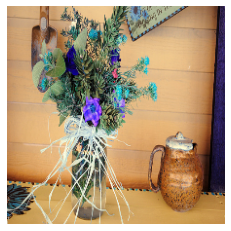

In [ ]:
plt.axis('off')
plt.imshow(X[1])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([750, 581, 986])

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

24576/10484 [======================================================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [52]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [53]:
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [54]:
image_labels[750]

'quill'

In [55]:
image_labels[581]

'greenhouse'

In [56]:
image_labels[986]

'daisy'

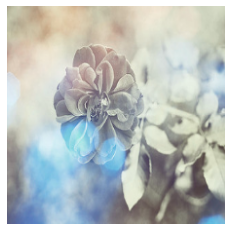

In [59]:
plt.axis('off')
plt.imshow(X[0])

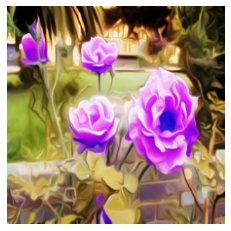

In [60]:
plt.axis('off')
plt.imshow(X[2])

In [61]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [62]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 77s 850ms/step - loss: 0.7837 - acc: 0.7086
Epoch 2/5
86/86 [==============================] - 73s 847ms/step - loss: 0.4050 - acc: 0.8594
Epoch 3/5
86/86 [==============================] - 73s 847ms/step - loss: 0.3135 - acc: 0.9001
Epoch 4/5
86/86 [==============================] - 73s 845ms/step - loss: 0.2613 - acc: 0.9186
Epoch 5/5
86/86 [==============================] - 73s 845ms/step - loss: 0.2218 - acc: 0.9397


In [64]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 822ms/step - loss: 0.3744 - acc: 0.8660


[0.37441954016685486, 0.8660130500793457]

In [66]:
x0_resized.shape

(224, 224, 3)

In [118]:
model.predict(np.array([img_resize]))

array([[-3.717576  , -2.194928  ,  1.8464448 , -0.57151693, -1.7192396 ]],
      dtype=float32)

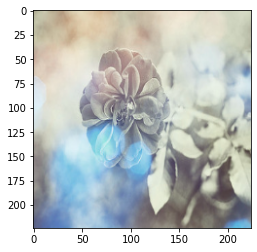

In [71]:
plt.imshow(X[0])

In [78]:
y_train[0]

2

In [79]:
y_train[1]

0

In [80]:
y_train[2]

1